In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
data = np.load("./data/fruits_300.npy")

In [8]:
data.shape

(300, 100, 100)

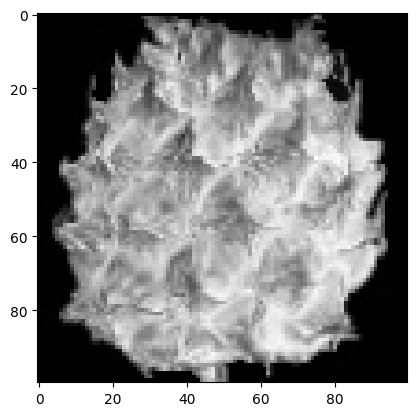

In [20]:
plt.imshow(data[150], cmap='gray')

In [18]:
8 >> 2

2

In [ ]:
1 1 1 1 1 1 1 1

for x in data[1]:
    print(x)

In [29]:
apple = data[0:100].reshape(-1, 10000)
pineapple = data[100:200].reshape(-1,10000)
banana = data[200:].reshape(-1, 10000)

In [33]:
apple.mean(axis=1)

array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
        94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
        93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
        92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
        94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
        90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
       100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
        87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
        96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
        89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
       103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
        91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
        82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
        98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
        88.7301,  86.643 ,  96.7323,  97.2604,  81.9424,  87.1

In [34]:
pineapple.mean(axis=1)

array([ 99.3239,  87.1622,  97.193 ,  97.4689,  98.8892,  97.8819,
        95.1444,  92.9461,  95.8412,  96.9487,  93.2863, 101.2771,
        91.6511,  98.3901,  84.3277, 100.7017,  99.0229,  87.5298,
        99.4109,  91.8568,  90.3877,  99.5066,  95.8498,  96.0728,
       100.0062,  95.5283,  95.2715,  98.1624,  93.1395,  99.1666,
        99.9519,  96.732 ,  94.16  , 100.7644, 101.1263,  98.2852,
        98.5354, 101.3809,  95.4862,  93.1256,  87.6404,  93.7146,
        94.7279,  85.5131,  95.0937,  95.3236,  92.7696,  94.4375,
        99.36  ,  95.8924,  97.8221,  99.4014,  99.325 ,  95.025 ,
        97.5771,  97.3511,  99.4891,  97.366 , 101.0062,  91.2304,
        95.2824,  95.3544, 101.4657,  97.5239,  98.8419,  96.746 ,
        98.2922,  96.3969,  81.9464,  93.4927,  97.3872,  82.4883,
        95.3665,  95.2541, 101.3074,  97.2391,  95.4544, 100.5576,
       100.2927,  94.3088,  95.7401,  97.0982,  96.9559,  92.9114,
        97.4164, 100.769 ,  97.808 ,  99.2481, 101.0643,  94.8

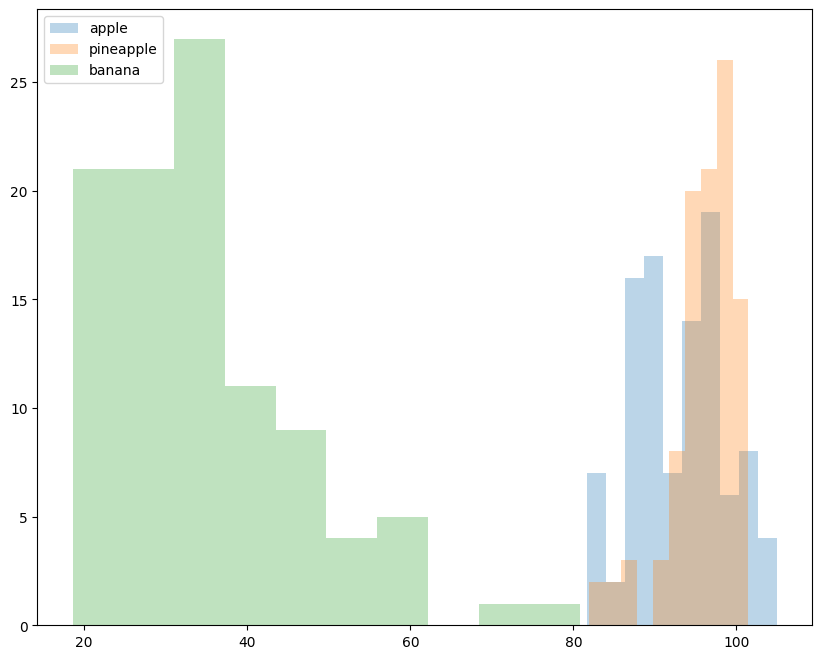

In [42]:
plt.figure(figsize=(10,8))
plt.hist(np.mean(apple, axis=1), alpha=0.3)
plt.hist(np.mean(pineapple, axis=1), alpha=0.3)
plt.hist(np.mean(banana, axis=1), alpha=0.3)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

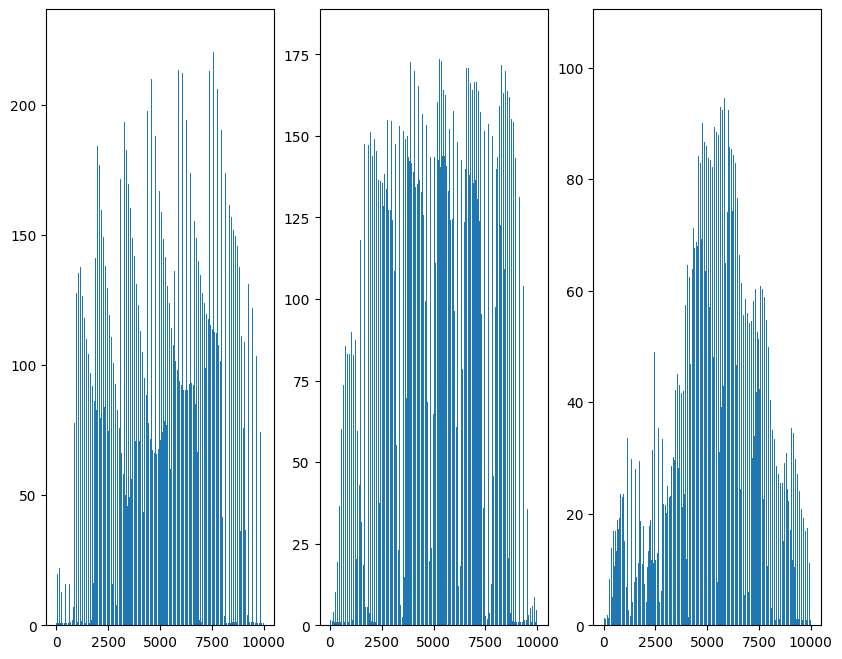

In [43]:
fig, axs = plt.subplots(1, 3, figsize=(10,8))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

In [47]:
apple.shape

(100, 10000)

In [51]:
apple_mean = np.mean(apple, axis=0).reshape(-1, 100)

In [52]:
apple_mean.shape

(100, 100)

In [59]:
apple_diff = np.abs(data - apple_mean)

In [64]:
abs_mean = np.mean(apple_diff, axis=(1,2))

In [72]:
apple_index = np.argsort(abs_mean)[:100]

In [ ]:
apple_index

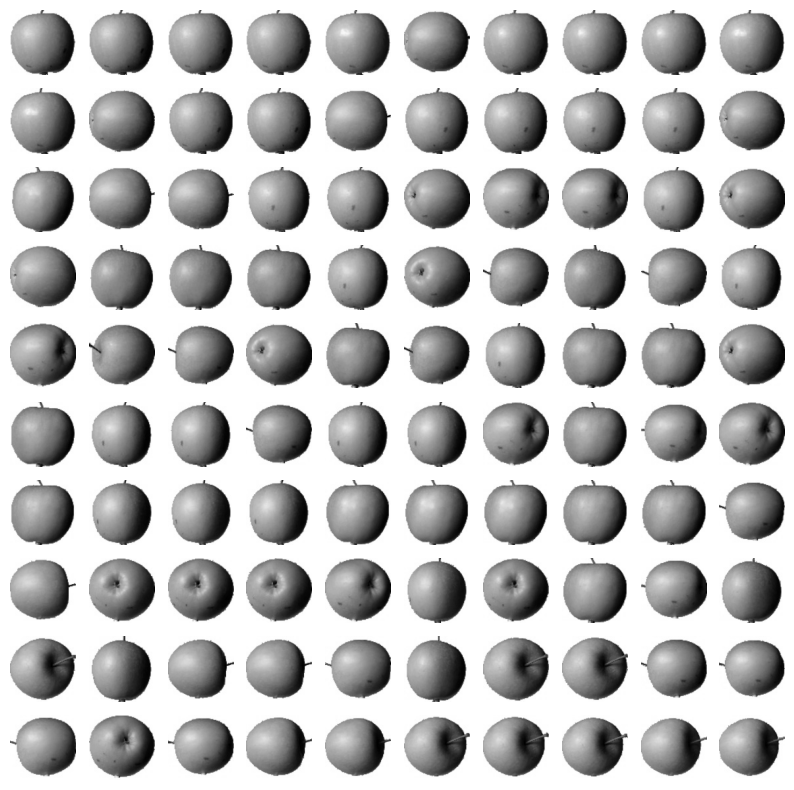

In [ ]:
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(data[apple_index[i*10 + j]], cmap='gray_r')
        axs[i,j].axis('off')
plt.show()

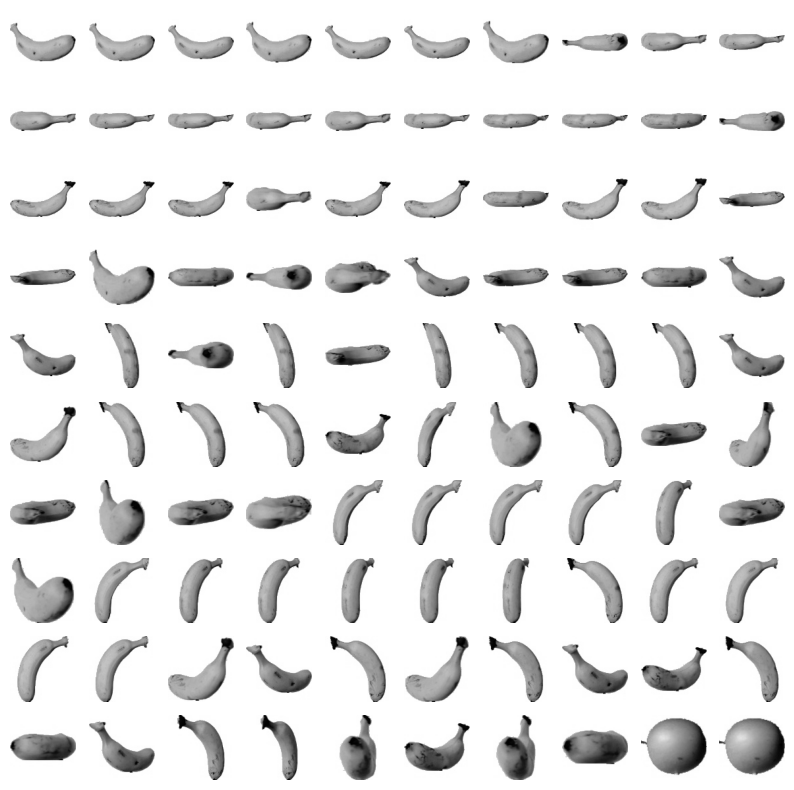

In [75]:

apple_mean = np.mean(banana, axis=0).reshape(-1, 100)
apple_diff = np.abs(data - apple_mean)
abs_mean = np.mean(apple_diff, axis=(1,2))
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(data[apple_index[i*10 + j]], cmap='gray_r')
        axs[i,j].axis('off')
plt.show()

In [76]:
from sklearn.cluster import KMeans

In [82]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(data.reshape(-1, 10000))

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [85]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([112,  98,  90]))

In [89]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

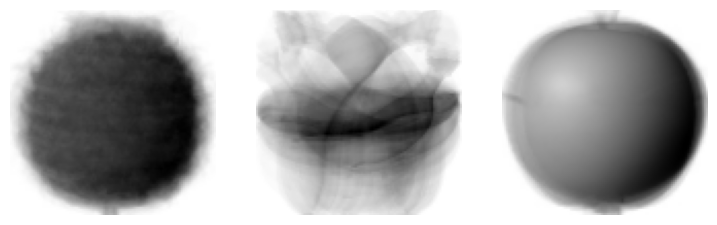

In [90]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [92]:
inertia = []
for k in range(2, 9):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(data.reshape(-1, 10000))
    inertia.append(km.inertia_)

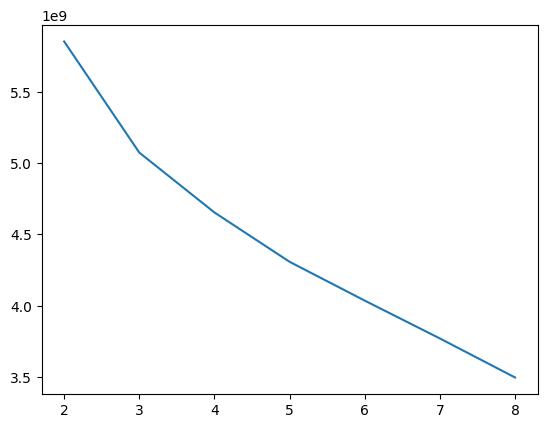

In [94]:
plt.plot(range(2,9), inertia)
plt.show()